##LIBRERÍAS Y PAQUETES

In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib.colors import LinearSegmentedColormap
from termcolor import colored as cl

In [ ]:
#Importación de las librerías necesarias para el acceso y obtención a los archivos de Gooogle Drive
from google.colab import auth
from google.colab import drive
from google.auth import default
auth.authenticate_user()
creds, _ = default()
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#LIMPIEZA DE DATOS (Primera Parte: Delitos)

In [ ]:
delitos_2015 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/2015.xlsx')

In [ ]:
delitos_2015

In [ ]:
delitos_2015.shape

In [ ]:
delitos_2016 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/2016.xlsx')

In [ ]:
delitos_2016

In [ ]:
delitos_2016.shape

In [ ]:
delitos_2017 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/2017.xlsx')

In [ ]:
delitos_2017

In [ ]:
delitos_2017.shape

In [ ]:
delitos_2018 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/2018.xlsx')

In [ ]:
delitos_2018

In [ ]:
delitos_2018.shape

In [ ]:
delitos_2019 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/2019.xlsx')

In [ ]:
delitos_2019

In [ ]:
delitos_2019.shape

In [ ]:
delitos_2020 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/2020.xlsx')

In [ ]:
delitos_2020

In [ ]:
delitos_2020.shape

In [ ]:
delitos_2021 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/2021.xlsx')

In [ ]:
delitos_2021

In [ ]:
delitos_2021.shape

In [ ]:
#Despivotaje de las tablas, Haciendo que las columnas de meses ahora aparezcan como filas 
melted_2015=delitos_2015.melt(id_vars=["Año",	"Clave_Ent","Entidad","Cve. Municipio","Municipio","Bien jurídico afectado","Tipo de delito","Subtipo de delito","Modalidad"],var_name="Mes",value_name="Casos")
melted_2015

In [ ]:
melted_2016=delitos_2016.melt(id_vars=["Año",	"Clave_Ent","Entidad","Cve. Municipio","Municipio","Bien jurídico afectado","Tipo de delito","Subtipo de delito","Modalidad"],var_name="Mes",value_name="Casos")
melted_2016

In [ ]:
melted_2017=delitos_2017.melt(id_vars=["Año",	"Clave_Ent","Entidad","Cve. Municipio","Municipio","Bien jurídico afectado","Tipo de delito","Subtipo de delito","Modalidad"],var_name="Mes",value_name="Casos")
melted_2017

In [ ]:
melted_2018=delitos_2018.melt(id_vars=["Año",	"Clave_Ent","Entidad","Cve. Municipio","Municipio","Bien jurídico afectado","Tipo de delito","Subtipo de delito","Modalidad"],var_name="Mes",value_name="Casos")
melted_2018

In [ ]:
melted_2019=delitos_2019.melt(id_vars=["Año",	"Clave_Ent","Entidad","Cve. Municipio","Municipio","Bien jurídico afectado","Tipo de delito","Subtipo de delito","Modalidad"],var_name="Mes",value_name="Casos")
melted_2019

In [ ]:
melted_2020=delitos_2020.melt(id_vars=["Año",	"Clave_Ent","Entidad","Cve. Municipio","Municipio","Bien jurídico afectado","Tipo de delito","Subtipo de delito","Modalidad"],var_name="Mes",value_name="Casos")
melted_2020

In [ ]:
melted_2021=delitos_2021.melt(id_vars=["Año",	"Clave_Ent","Entidad","Cve. Municipio","Municipio","Bien jurídico afectado","Tipo de delito","Subtipo de delito","Modalidad"],var_name="Mes",value_name="Casos")
melted_2021

In [ ]:
#Pequeños dataframes en uno conjunto
frames = [melted_2015,melted_2016,melted_2017,melted_2018,melted_2019,melted_2020,melted_2021]
delitos = pd.concat(frames)
delitos

In [ ]:
#Creación de una columna donde se almacene la fecha conjunta
delitos['Fecha'] = delitos["Mes"].astype(str) +" "+ delitos["Año"].astype(str)
delitos

In [ ]:
#Reset del índice para quitar la columna de ceros
delitos.reset_index(drop=True,inplace=True)

In [ ]:
#Asignación de clave numérica a cada mes (diccionario)
key={'Enero':1,'Febrero':2,'Marzo':3,'Abril':4,'Mayo':5,'Junio':6,'Julio':7,'Agosto':8,'Septiembre':9,'Octubre':10,'Noviembre':11,'Diciembre':12}

In [ ]:
#Conversión de todos los meses a su clave numérica
meses=delitos["Fecha"].apply(lambda x:key.get(x[:-5]))

In [ ]:
años=delitos["Fecha"].apply(lambda x:int(x[-4:])) #tomar 4 dígitos del año

In [ ]:
#Conversión de fecha string a formato fecha
fechas_almacen=[]

for i in range(len(años)):
  fechas_almacen.append(datetime.date(años[i],meses[i],1))

In [ ]:
delitos["Fecha"]=fechas_almacen

In [ ]:
delitos.head()

In [ ]:
delitos.shape

In [ ]:
delitos["Casos"].count() #Corroborado, no hay datos nulos

#LIMPIEZA DE DATOS(2da Parte: Población)

In [ ]:
#latin-1 decodficador para evitar errores leyendo bytes
base1_conapo = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/base_municipios_01.csv',encoding='latin-1')

In [ ]:
base1_conapo

In [ ]:
#latin-1 decodficador para evitar errores leyendo bytes
base2_conapo = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/base_municipios_02.csv',encoding='latin-1')

In [ ]:
base2_conapo

In [ ]:
bases = [base1_conapo,base2_conapo]
pob_sinfiltro = pd.concat(bases)

In [ ]:
pob_sinfiltro

In [ ]:
#eliminación de columna no útil
pob_sinfiltro.pop('RENGLON')

In [ ]:
pob_sinfiltro.drop(["CLAVE_ENT","NOM_ENT"],axis=1,inplace=True)

In [ ]:
pob_sinfiltro

,CLAVE,MUN,SEXO,AÑO,EDAD_QUIN,POB
0,1001,Aguascalientes,Mujeres,2015,pobm_00_04,39403
1,1001,Aguascalientes,Mujeres,2016,pobm_00_04,39204
2,1001,Aguascalientes,Mujeres,2017,pobm_00_04,38891
3,1001,Aguascalientes,Mujeres,2018,pobm_00_04,38581
4,1001,Aguascalientes,Mujeres,2019,pobm_00_04,38272
...,...,...,...,...,...,...
653627,32058,Santa María de la Paz,Hombres,2026,pobm_65_mm,233
653628,32058,Santa María de la Paz,Hombres,2027,pobm_65_mm,239
653629,32058,Santa María de la Paz,Hombres,2028,pobm_65_mm,246
653630,32058,Santa María de la Paz,Hombres,2029,pobm_65_mm,253


In [ ]:
#Selección de los datos correspondientes al periodo de estudio
pob_sinfiltro = pob_sinfiltro[pob_sinfiltro["AÑO"]<=2021]
pob_sinfiltro

,CLAVE,MUN,SEXO,AÑO,EDAD_QUIN,POB
0,1001,Aguascalientes,Mujeres,2015,pobm_00_04,39403
1,1001,Aguascalientes,Mujeres,2016,pobm_00_04,39204
2,1001,Aguascalientes,Mujeres,2017,pobm_00_04,38891
3,1001,Aguascalientes,Mujeres,2018,pobm_00_04,38581
4,1001,Aguascalientes,Mujeres,2019,pobm_00_04,38272
...,...,...,...,...,...,...
653618,32058,Santa María de la Paz,Hombres,2017,pobm_65_mm,193
653619,32058,Santa María de la Paz,Hombres,2018,pobm_65_mm,195
653620,32058,Santa María de la Paz,Hombres,2019,pobm_65_mm,198
653621,32058,Santa María de la Paz,Hombres,2020,pobm_65_mm,202


In [ ]:
#Agrupación de la población joven de interés: Hombres entre 15 y 25 años
pob_hombres=pob_sinfiltro[pob_sinfiltro["SEXO"]=="Hombres"]
pob_edad=pob_hombres[pob_hombres["EDAD_QUIN"].isin(["pobm_15_19","pobm_20_24"])]
pob_joven=pob_edad.groupby(by=["CLAVE","AÑO"]).agg({"POB":["sum"]})
#pob_joven2 es la población joven pero a nivel nacional
pob_joven2=pob_edad.groupby(by=["AÑO"]).agg({"POB":["sum"]}).reset_index(drop=False)
pob_joven.reset_index(drop=False,inplace=True)
pob_joven2

In [ ]:
#Suma de la población de cada municipio
pob_total=pob_sinfiltro.groupby(by=["CLAVE","AÑO"]).agg({"POB":["sum"]})
pob_total.reset_index(drop=False,inplace=True)
pob_total

In [ ]:
población=pob_total.merge((pob_joven),on=["CLAVE","AÑO"])
población.columns=["Cve. Municipio","Año","Pob Total","Pob Joven"]
población

In [ ]:
delitos=delitos.merge((población),on=["Cve. Municipio","Año"])

In [ ]:
delitos.head()

Tasa de Incidencia Delictiva Municipal

In [ ]:
tasa_muni = []
for i in range(len(delitos)):
  tasa_muni.append((delitos["Casos"][i]/delitos["Pob Total"][i])*100000)

In [ ]:
delitos["Tasa Incidencia Municipal"]=tasa_muni
delitos

#CREACIÓN DE ARCHIVO CON LA BASE DE DATOS CONFORMADA

In [ ]:
#utf-8-sig = encoding en español
delitos.to_csv('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/Base_Datos.csv',sep=',',index=False,encoding = 'utf-8-sig')


In [ ]:
base_datos = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/Base_Datos.csv')

In [ ]:
base_datos.head()

In [ ]:
base_datos.columns

#TASA DE INCIDENCIA DELICTIVA NACIONAL

In [ ]:
#Agrupación de delitos por año y tipo
delitos_agregados = (base_datos.groupby(by=["Tipo de delito","Año"]).agg({"Casos":["sum"]})).reset_index(drop=False)
delitos_agregados.columns = ['Tipo de delito','Año','Casos']
delitos_agregados.head()

In [ ]:
pob_nacional = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/Poblacion.xlsx')

In [ ]:
pob_nacional.columns = ['Año','Pob']

In [ ]:
pob_nacional

In [ ]:
#Pegar población con los delitos agregados anualmente
data = delitos_agregados.merge(pob_nacional,on='Año')
data.reset_index(drop=True,inplace=True)
data.head()

In [ ]:
#Calculo de la tasa

In [ ]:
tasa_nac = []
for i in range(len(data)):
  tasa_nac.append((data["Casos"][i]/data["Pob"][i])*100000)

In [ ]:
data['Tasa Nacional'] = tasa_nac

In [ ]:
data.head()

In [ ]:
tasa_ordenada = data.sort_values('Tasa Nacional',ascending = False)

In [ ]:
tasa_ordenada

In [ ]:
tasa_ordenada.reset_index(drop=True,inplace=True) #reinicio índice porque esta desordenado

In [ ]:
#Me permite cambiando el parámetro del año ver los delitos con mayor incidencia anual
tasa_ordenada[tasa_ordenada['Año']==2015]

In [ ]:
tasa_nacional = data
tasa_nacional.head()

Tasa por cada año mensual

In [ ]:
#Agrupación de delitos por mes y tipo
delitos_agregados2 = (base_datos.groupby(by=["Tipo de delito","Año","Mes"]).agg({"Casos":["sum"]})).reset_index(drop=False)
delitos_agregados2.columns = ['Tipo de delito','Año','Mes','Casos']
delitos_agregados2.head()

In [ ]:
pob_nacional = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/Poblacion.xlsx')
pob_nacional.columns = ['Año','Pob']

In [ ]:
#Pegar población con los delitos agregados anualmente
data_mensual = delitos_agregados2.merge(pob_nacional,on='Año')
data_mensual.reset_index(drop=True,inplace=True)
data_mensual.head()

,Tipo de delito,Año,Mes,Casos,Pob
0,Aborto,2015,Abril,54,121350000
1,Aborto,2015,Agosto,52,121350000
2,Aborto,2015,Diciembre,35,121350000
3,Aborto,2015,Enero,38,121350000
4,Aborto,2015,Febrero,56,121350000


In [ ]:
data_mensual['Fecha'] = data_mensual['Mes'].astype(str)+" "+data_mensual['Año'].astype(str)
data_mensual

In [ ]:
data_mensual['Fecha'] = data_mensual['Mes'].astype(str)+" "+data_mensual['Año'].astype(str)
data_mensual

In [ ]:
data_mensual.reset_index(drop=True,inplace=True)

In [ ]:
key={'Enero':1,'Febrero':2,'Marzo':3,'Abril':4,'Abril ':4,'Mayo':5,'Junio':6,'Julio':7,'Agosto':8,'Septiembre':9,'Octubre':10,'Noviembre':11,'Diciembre':12}

In [ ]:
meses = data_mensual['Fecha'].apply(lambda x:key.get(x[:-5]))

In [ ]:
años = data_mensual['Fecha'].apply(lambda x:int(x[-4:]))

In [ ]:
fechas_almacen=[]

for i in range(len(años)):
  fechas_almacen.append(datetime.date(años[i],meses[i],1))

In [ ]:
data_mensual['Fecha'] = fechas_almacen

In [ ]:
data_mensual.head()

In [ ]:
#Calculo de la tasa
tasa_mensual_nac = []
for i in range(len(data_mensual)):
  tasa_mensual_nac.append((data_mensual["Casos"][i]/data_mensual["Pob"][i])*100000)

In [ ]:
data_mensual['Tasa Nacional Mes'] = tasa_mensual_nac
data_mensual

In [ ]:
tasa_ordenada_mensual = data_mensual.sort_values('Tasa Nacional Mes',ascending = False)
tasa_ordenada_mensual

In [ ]:
tasa_2015 = data_mensual[data_mensual['Año']==2015].reset_index(drop = True)
tasa_2015 = tasa_2015.sort_values(by='Fecha').reset_index(drop = True)
tasa_2015.head()

In [ ]:
tasa_2016 = data_mensual[data_mensual['Año']==2016].reset_index(drop=True)
tasa_2016 = tasa_2016.sort_values(by='Fecha').reset_index(drop = True)
tasa_2016.head()

In [ ]:
tasa_2017 = data_mensual[data_mensual['Año']==2017].reset_index(drop=True)
tasa_2017 = tasa_2017.sort_values(by='Fecha').reset_index(drop = True)
tasa_2017.head()

In [ ]:
tasa_2018 = data_mensual[data_mensual['Año']==2018].reset_index(drop=True)
tasa_2018 = tasa_2018.sort_values(by='Fecha').reset_index(drop = True)
tasa_2018.head()

In [ ]:
tasa_2019 = data_mensual[data_mensual['Año']==2019].reset_index(drop=True)
tasa_2019 = tasa_2019.sort_values(by='Fecha').reset_index(drop = True)
tasa_2019.head()

In [ ]:
tasa_2020 = data_mensual[data_mensual['Año']==2020].reset_index(drop=True)
tasa_2020 = tasa_2020.sort_values(by='Fecha').reset_index(drop = True)
tasa_2020.head()

In [ ]:
tasa_2021 = data_mensual[data_mensual['Año']==2021].reset_index(drop=True)
tasa_2021 = tasa_2021.sort_values(by='Fecha').reset_index(drop = True)
tasa_2021.head()

#TASAS COMPLEMENTARIAS: Agrupamiento

Tasa de Condiciones Críticas de Ocupación

In [ ]:
TCCO_mensual = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/Condiciones Críticas de Ocupación.xlsx')

In [ ]:
TCCO_mensual

In [ ]:
#Agregar TCCO anual
TCCO_fecha = TCCO_mensual
TCCO_fecha['Año'] = TCCO_fecha['Fecha'].dt.year
TCCO_fecha['Mes'] = TCCO_fecha['Fecha'].dt.month
TCCO_fecha

In [ ]:
TCCO_anual = TCCO_fecha.groupby(by=['Año']).agg({'Condiciones Críticas de Ocupación':['mean']}).reset_index(drop=False)

In [ ]:
TCCO_anual = pd.DataFrame((TCCO_anual['Año'].values.astype(int),TCCO_anual['Condiciones Críticas de Ocupación']['mean'].values)).T

In [ ]:
TCCO_anual.columns = ['Año', 'Concidiones Críticas de Ocupación']

In [ ]:
TCCO_anual['Año'] = TCCO_anual['Año'].astype(int)

In [ ]:
TCCO_anual

In [ ]:
TCCO_anual.columns=['Año','Condiciones Críticas de Ocupación']

In [ ]:
TCCO_anual

Tasa de Presión General

In [ ]:
TPGR_m_mujeres = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/Presión General_Mujeres.xlsx')

In [ ]:
TPGR_m_mujeres

In [ ]:
TPGR_fecha_mujeres = TPGR_m_mujeres
TPGR_fecha_mujeres['Año'] = TPGR_fecha_mujeres['Fecha'].dt.year
TPGR_fecha_mujeres['Mes'] = TPGR_fecha_mujeres['Fecha'].dt.month
TPGR_fecha_mujeres

In [ ]:
TPGR_a_mujeres = TPGR_fecha_mujeres.groupby(by=['Año']).agg({'Presión General Mujeres':['mean']}).reset_index(drop=False)
TPGR_a_mujeres

In [ ]:
 TPGR_a_mujeres = pd.DataFrame((TPGR_a_mujeres['Año'].values,TPGR_a_mujeres['Presión General Mujeres']['mean'].values)).T

In [ ]:
TPGR_a_mujeres

In [ ]:
TPGR_a_mujeres.columns=['Año','Presión General Mujeres']

In [ ]:
 TPGR_a_mujeres['Año'] = TPGR_a_mujeres['Año'].astype(int)

In [ ]:
TPGR_a_mujeres

In [ ]:
TPGR_m_hombres = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/Presión General_Hombres.xlsx')

In [ ]:
TPGR_fecha_hombres = TPGR_m_hombres
TPGR_fecha_hombres['Año'] = TPGR_fecha_hombres['Fecha'].dt.year
TPGR_fecha_hombres['Mes'] = TPGR_fecha_hombres['Fecha'].dt.month
TPGR_fecha_hombres

In [ ]:
TPGR_a_hombres = TPGR_fecha_hombres.groupby(by=['Año']).agg({'Presión General Hombres':['mean']}).reset_index(drop=False)

In [ ]:
 TPGR_a_hombres = pd.DataFrame((TPGR_a_hombres['Año'].values,TPGR_a_hombres['Presión General Hombres']['mean'].values)).T

In [ ]:
 TPGR_a_hombres.columns = ['Año','Presión General Hombres']

In [ ]:
TPGR_a_hombres['Año'] = TPGR_a_hombres['Año'].astype(int)

In [ ]:
TPGR_m_gral = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/Presión General_Total.xlsx')

In [ ]:
TPGR_fecha_gral = TPGR_m_gral
TPGR_fecha_gral['Año'] = TPGR_fecha_gral['Fecha'].dt.year
TPGR_fecha_gral['Mes'] = TPGR_fecha_gral['Fecha'].dt.month
TPGR_fecha_gral

In [ ]:
TPGR_a_gral = TPGR_fecha_gral.groupby(by=['Año']).agg({'Presión General Total':['mean']}).reset_index(drop=False)

In [ ]:
TPGR_a_gral = pd.DataFrame((TPGR_a_gral['Año'],TPGR_a_gral['Presión General Total']['mean'].values)).T

In [ ]:
TPGR_a_gral.columns=['Año','Presión General Total']

In [ ]:
TPGR_a_gral['Año'] = TPGR_a_gral['Año'].astype(int)

In [ ]:
TPGR_a_gral

Tasa de Ocupación y Desocupación

In [ ]:
oc_des_mensual = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/Ocupación_Desocupación.xlsx')

In [ ]:
oc_des_mensual

In [ ]:
oc_des_fecha = oc_des_mensual
oc_des_fecha['Año'] = oc_des_fecha['Fecha'].dt.year
oc_des_fecha['Mes'] = oc_des_fecha['Fecha'].dt.month
oc_des_fecha

In [ ]:
oc_des_anual = oc_des_fecha.groupby(by=['Año']).agg({'Tasa ocupación/desocupación':['mean']}).reset_index(drop=False)

In [ ]:
oc_des_anual = pd.DataFrame((oc_des_anual['Año'].values,oc_des_anual['Tasa ocupación/desocupación']['mean'].values)).T

In [ ]:
oc_des_anual.columns = ['Año','Tasa de ocupación/desocupación']

In [ ]:
oc_des_anual['Año']=oc_des_anual['Año'].astype(int)

In [ ]:
oc_des_anual

#DIVISIÓN DEL TERRITORIO NACIONAL

In [ ]:
#Delimitación/conformación de cada zona
Norte = ['Baja California', 'Baja California Sur','Sonora','Sinaloa','Chihuahua','Durango','Coahuila de Zaragoza','Nuevo León','Tamaulipas','Zacatecas','Nayarit','Jalisco']
Centro = ['Colima','Michoacán de Ocampo','Aguascalientes','San Luis Potosí','Guanajuato','Querétaro','Hidalgo', 'México','Ciudad de México','Morelos','Tlaxcala','Puebla']
Sur = ['Guerrero','Oaxaca','Chiapas','Tabasco','Campeche','Yucatán','Quintana Roo','Veracruz de Ignacio de la Llave']

In [ ]:
#Ciclo que recorre cada fila y le coloca la región correspondiente según el nombre de su entidad, agregando una columna llamada "Region"
region =[]

for i in range(len(base_datos)):

  if base_datos['Entidad'][i] in Centro:
    region.append('Centro')

  if base_datos['Entidad'][i] in Norte:
    region.append('Norte')

  if base_datos['Entidad'][i] in Sur:
    region.append('Sur')

base_datos['Región']  = region

In [ ]:
base_datos

In [ ]:
#utf-8-sig = encoding en español
base_datos.to_csv('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/Datos_Finales.csv',sep=',',index=False,encoding = 'utf-8-sig')

In [ ]:
base_datos = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/Datos_Finales.csv')
base_datos.head()


#ANÁLISIS

Los delitos seleccionados y con los que se trabajará de aquí en adelante para el análisis en el desarrollo de este proyecto son: Robo, Violencia Familiar,Abuso Sexual,Extorsión,Feminicidio,Narcomenudeo

In [ ]:
delitos_seleccionados = tasa_ordenada[tasa_ordenada["Tipo de delito"].isin(["Robo","Homicidio","Narcomenudeo","Violencia familiar","Abuso sexual","Extorsión","Feminicidio","Secuestro"])]
delitos_seleccionados

#Análisis de los delitos en general

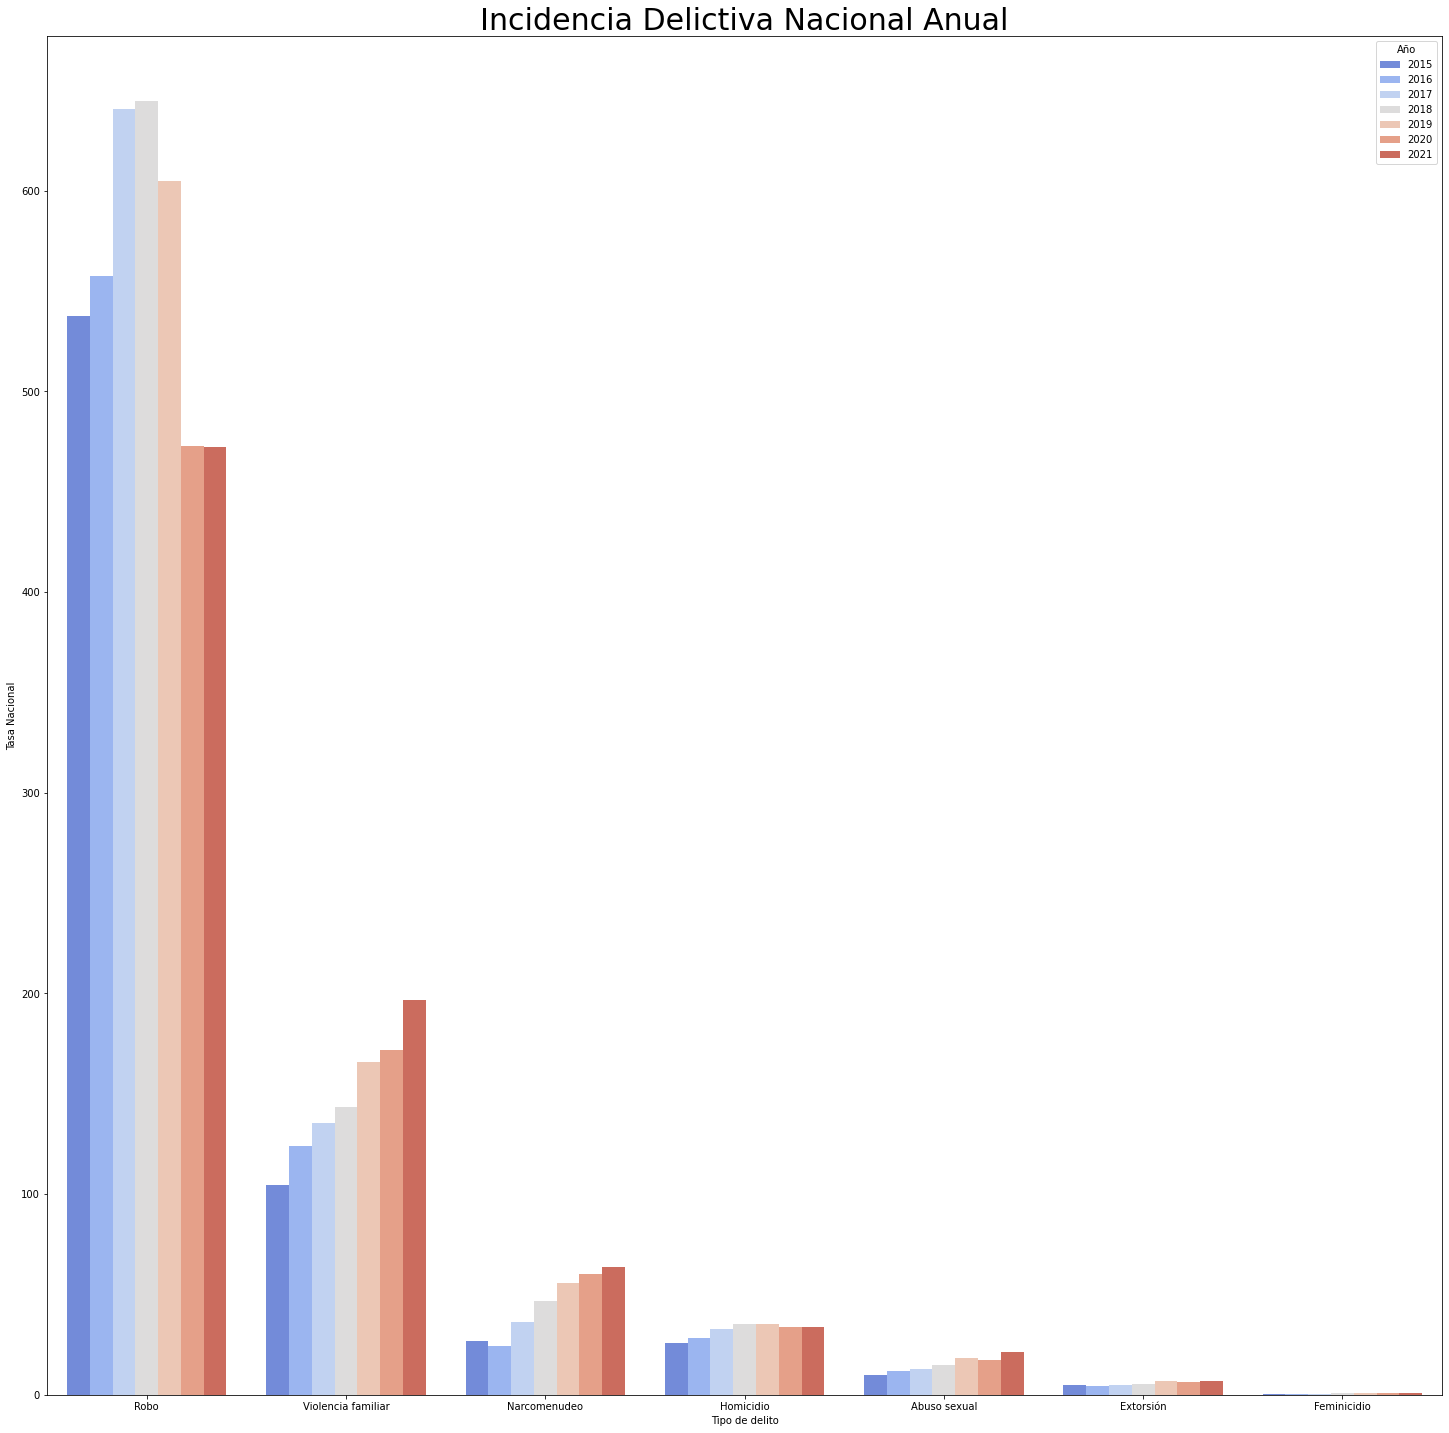

In [ ]:
#Tasa nacional anual del periodo 2015-2021
fig1 = plt.figure(figsize=(25,25))
plt.style.use('default')
plt.title('Incidencia Delictiva Nacional Anual',fontsize=30)
sns.barplot(data=tasa_ordenada[tasa_ordenada["Tipo de delito"].isin(["Robo","Homicidio","Narcomenudeo","Violencia familiar","Abuso sexual","Extorsión","Feminicidio"])], x='Tipo de delito',y='Tasa Nacional',hue='Año',palette='coolwarm')

Text(0, 0.5, 'Tasa')

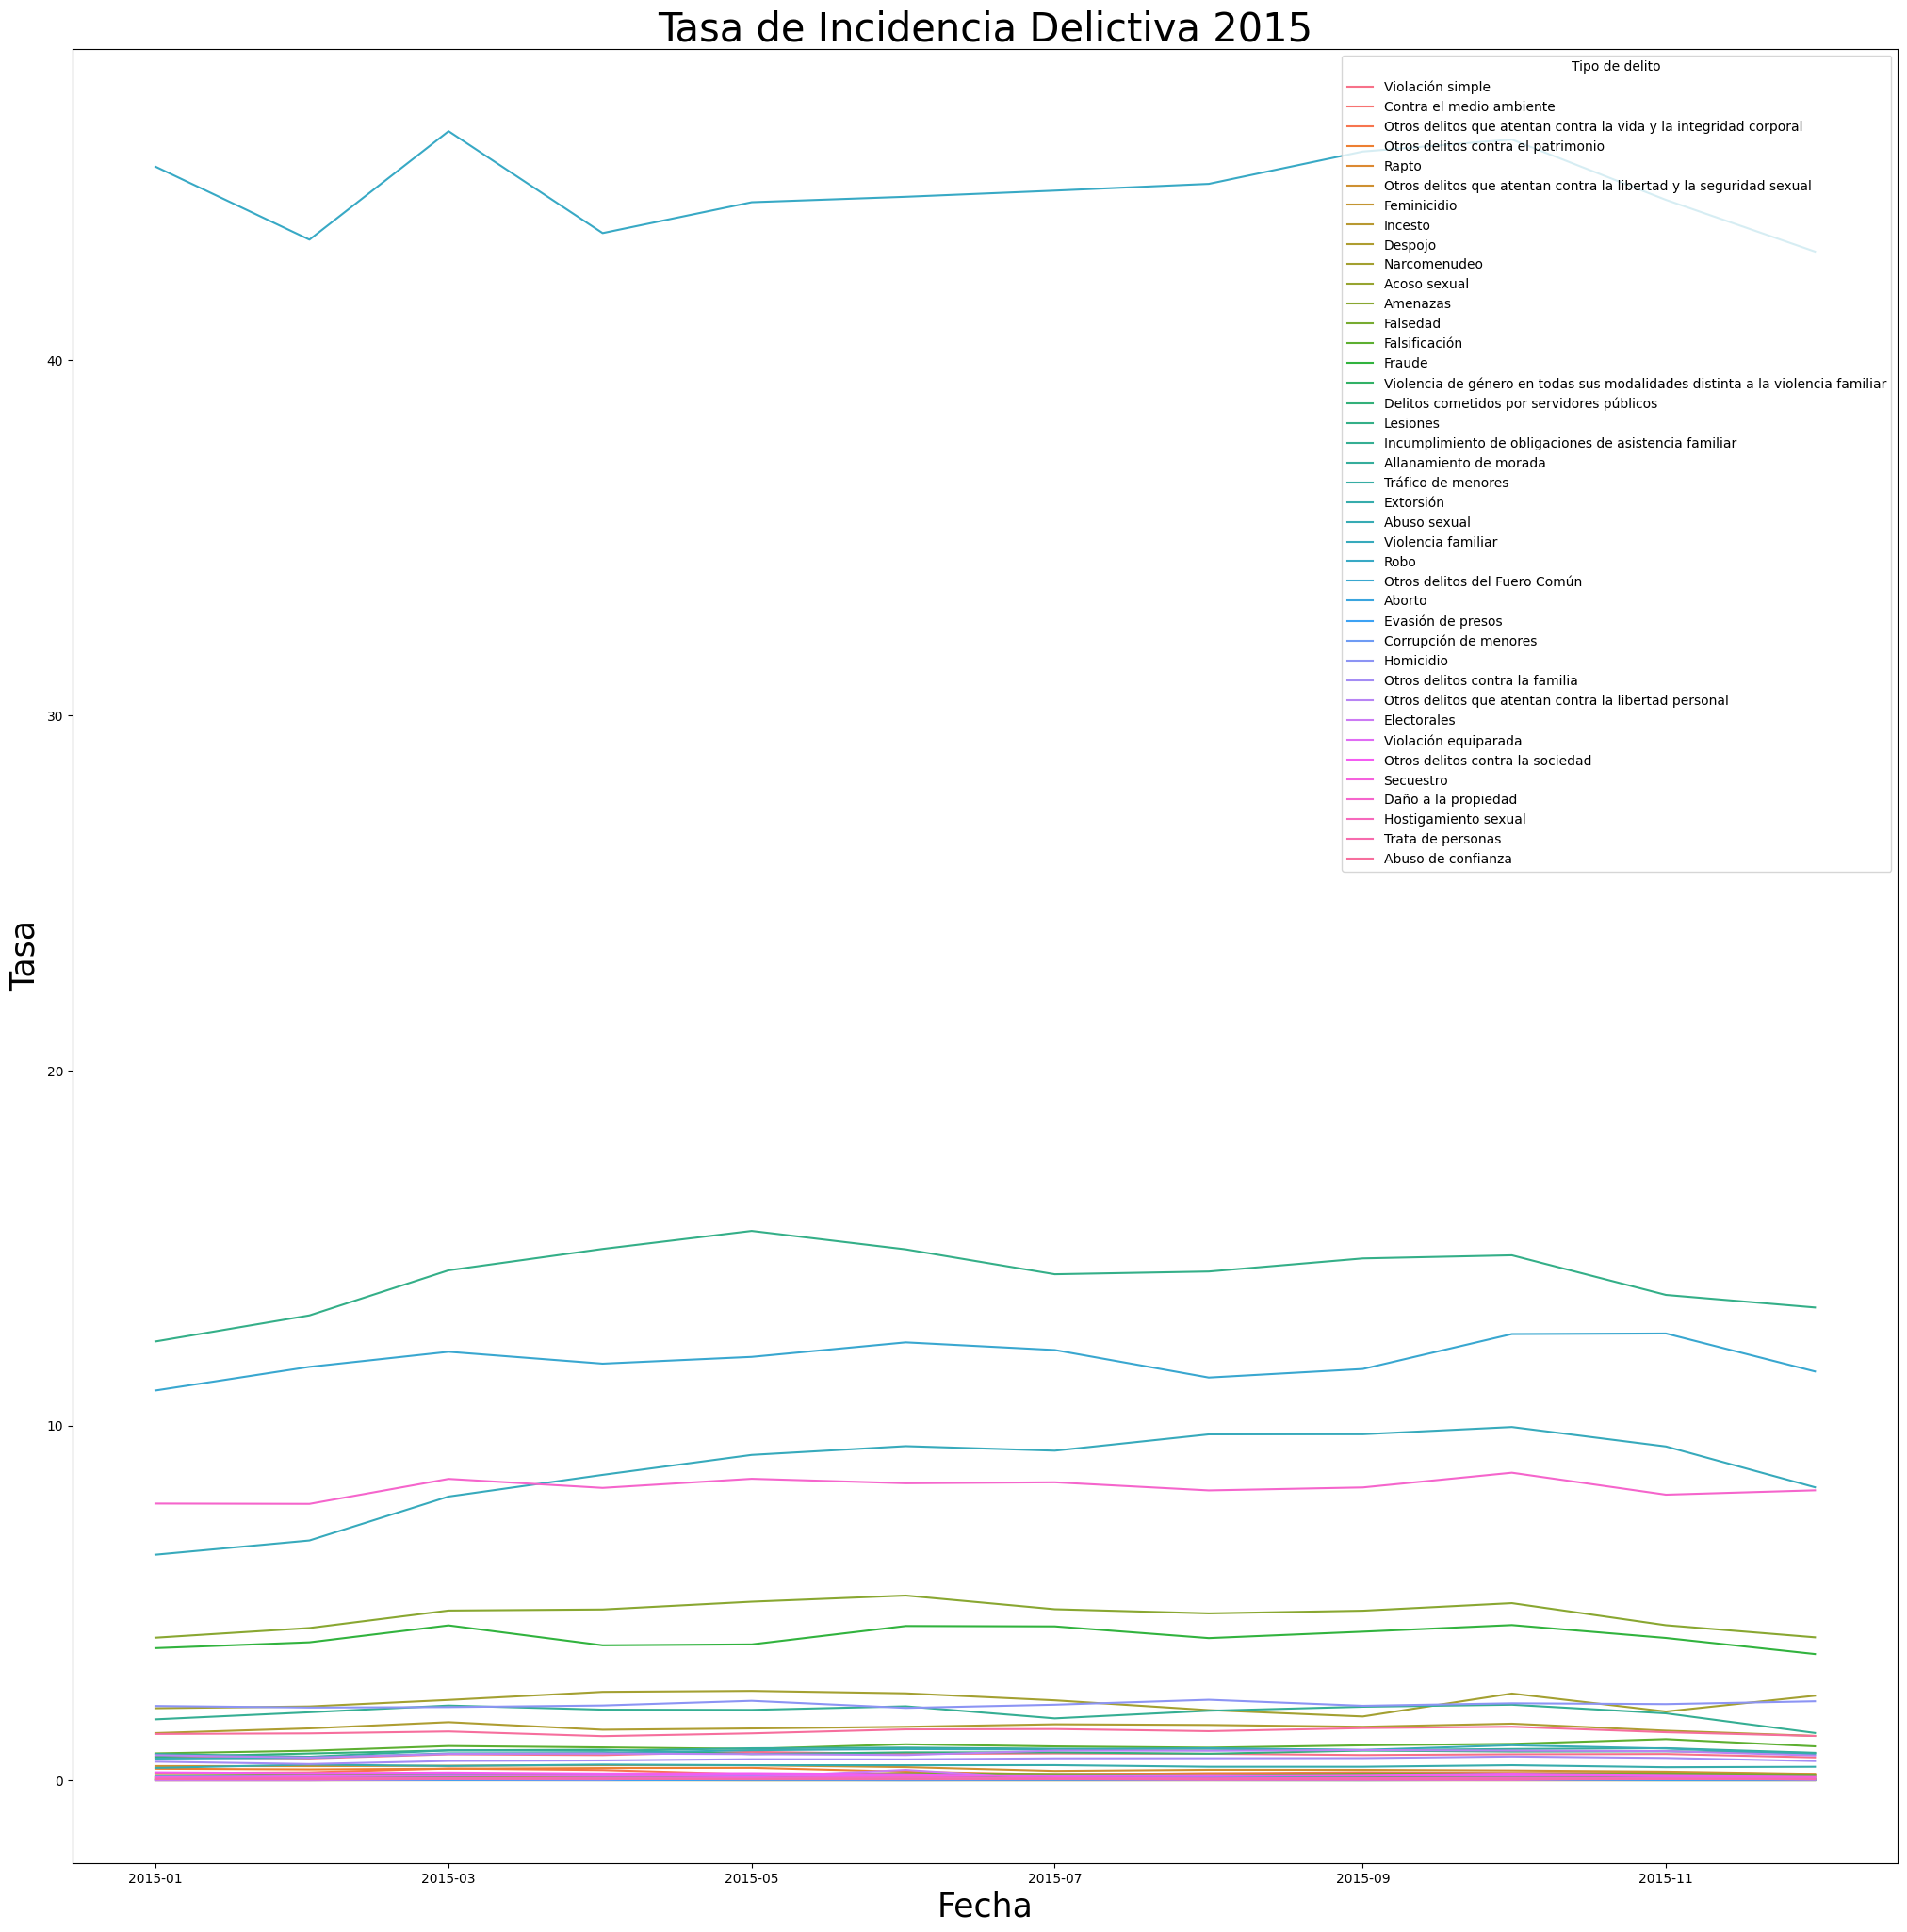

In [ ]:
#Tasa Nacional Mensual 2015
plt.figure(figsize=(25,25))
plt.title('Tasa de Incidencia Delictiva 2015',fontsize=30)
sns.lineplot(data=tasa_2015,x='Fecha',y='Tasa Nacional Mes',hue = 'Tipo de delito',ci = None)
plt.xlabel('Fecha',fontsize=25)
plt.ylabel('Tasa',fontsize=25)

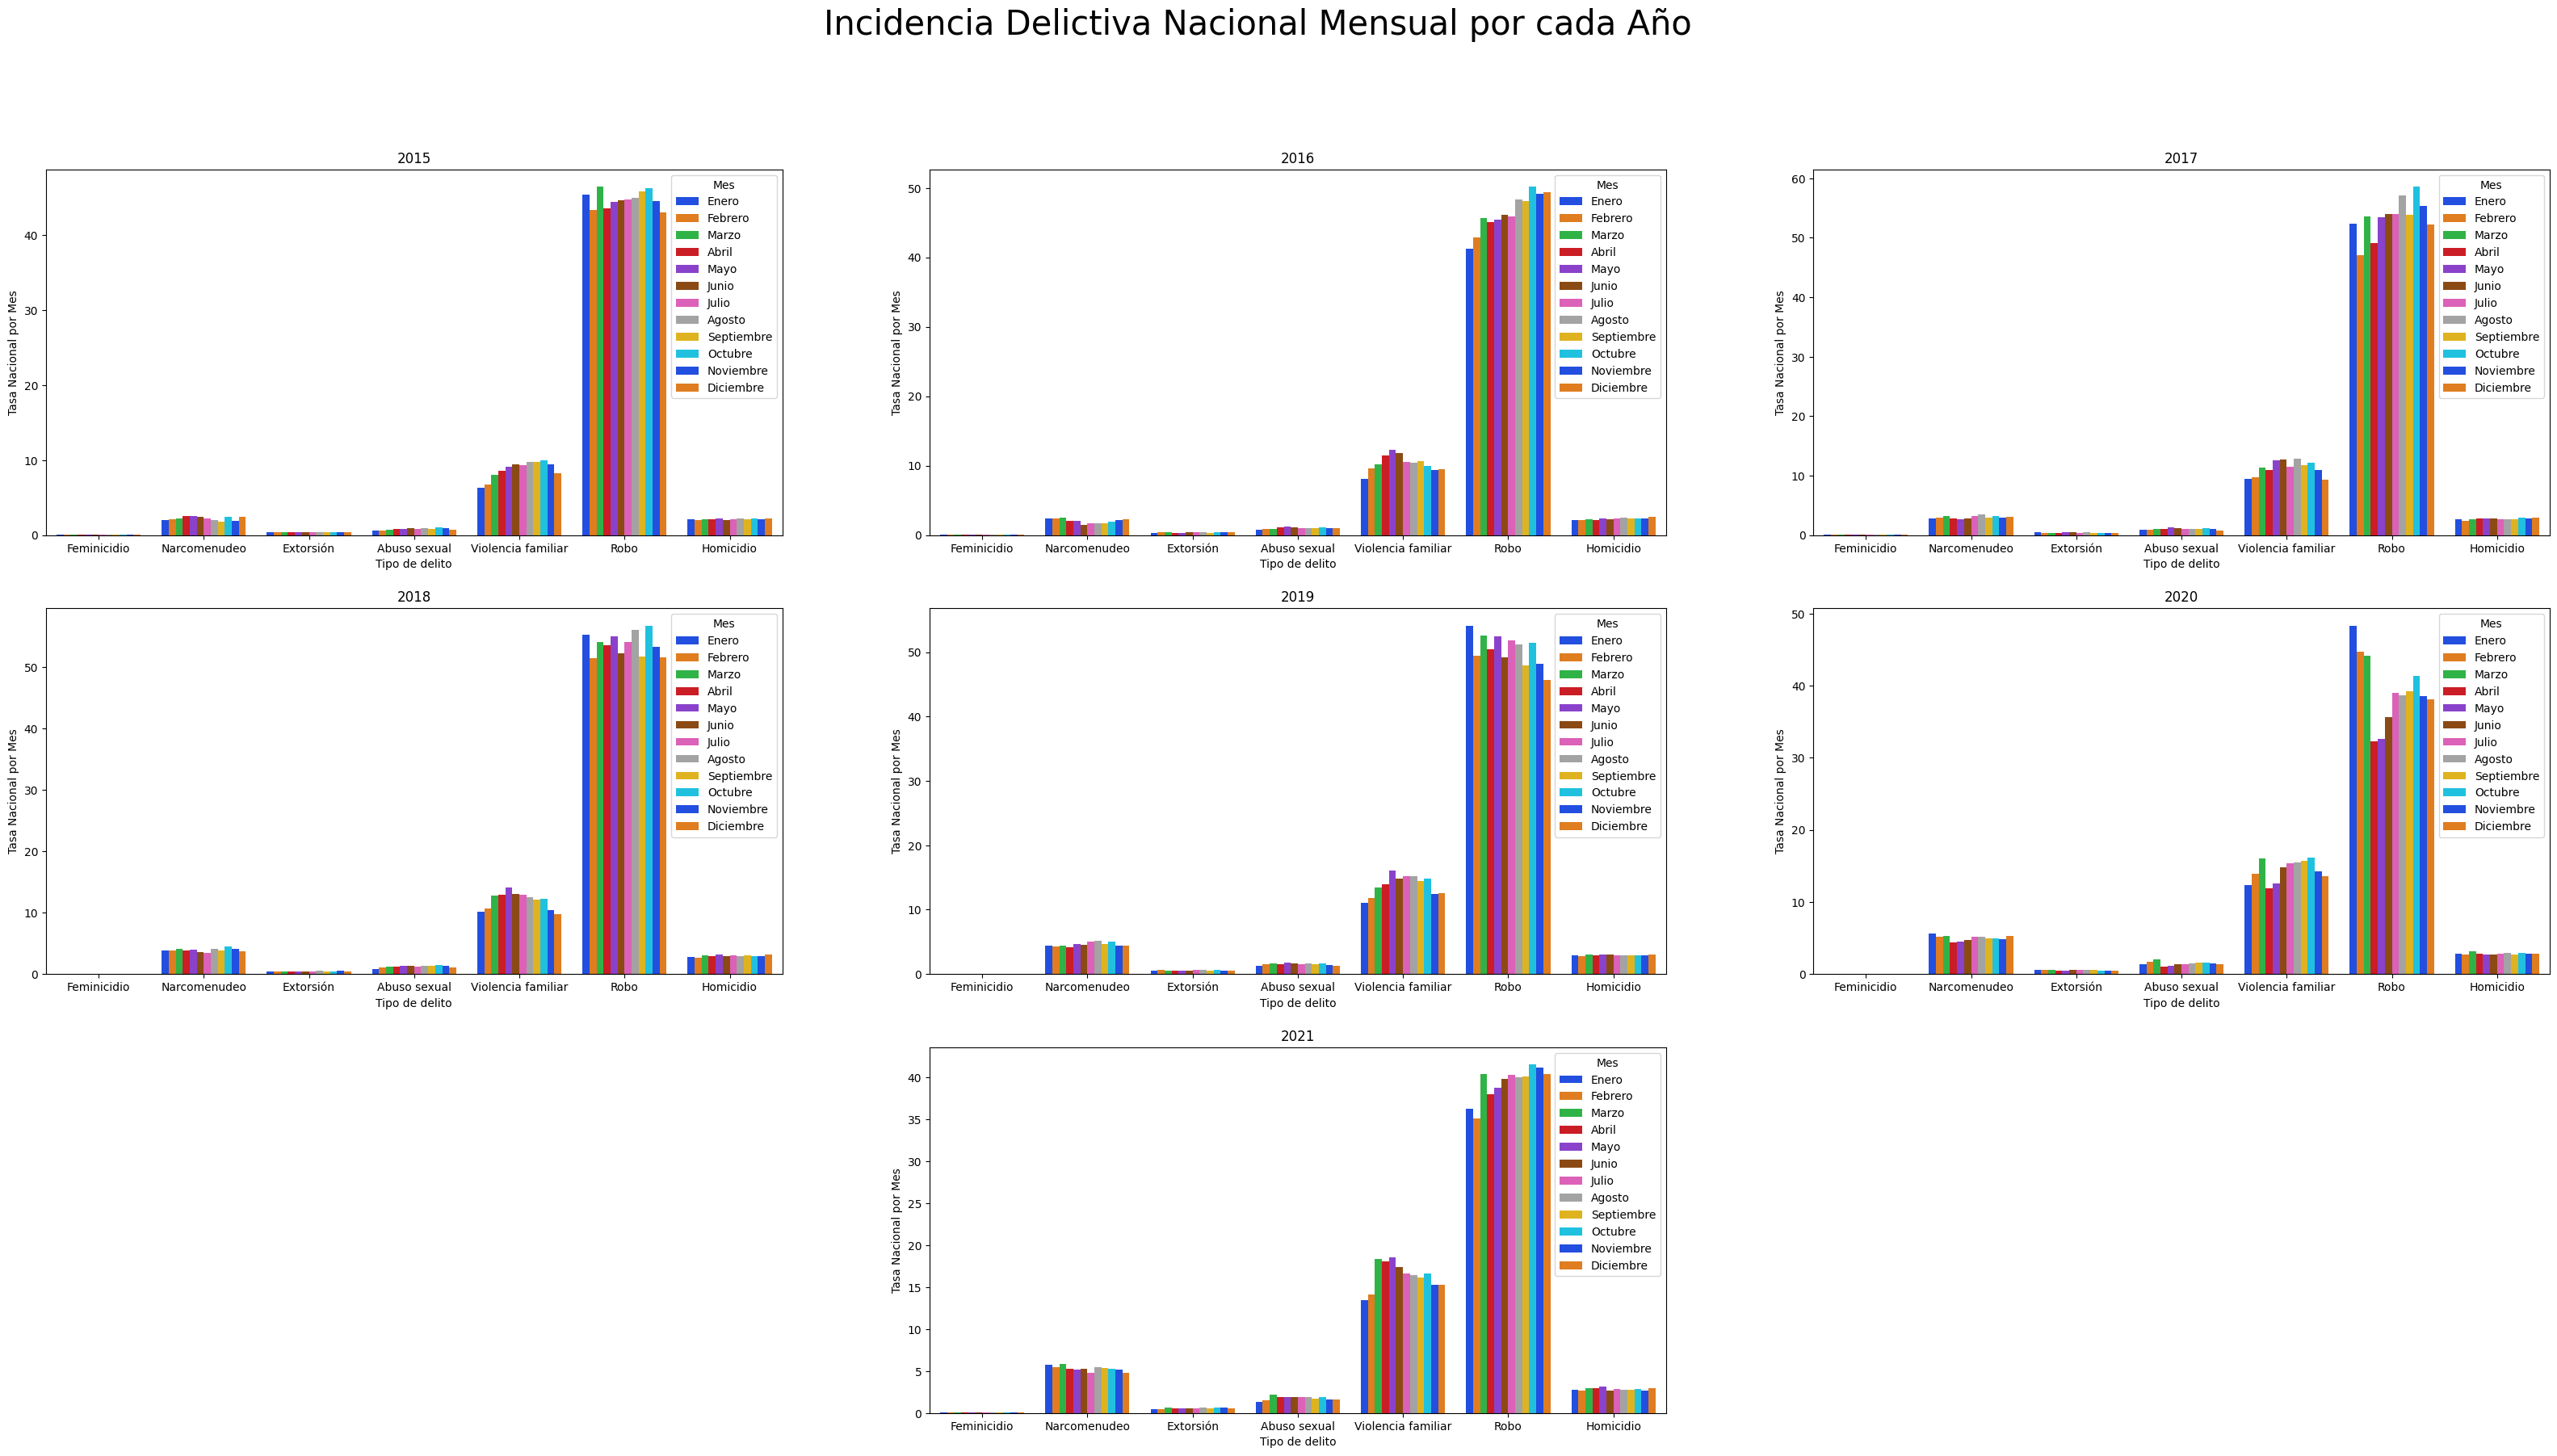

In [ ]:
#Tasa nacional seccionada por mes en el periodo 2015-2021
fig,axs=plt.subplots(3,3,figsize=(40,20))
fig.suptitle('Incidencia Delictiva Nacional Mensual por cada Año',fontsize=30)
sns.barplot(data=tasa_2015[tasa_2015["Tipo de delito"].isin(["Robo","Homicidio","Narcomenudeo","Violencia familiar","Abuso sexual","Extorsión","Feminicidio"])], x='Tipo de delito',y='Tasa Nacional Mes',hue='Mes',palette='bright',ax=axs[0,0])
axs[0,0].set(xlabel='Tipo de delito',ylabel='Tasa Nacional por Mes',title='2015')
sns.barplot(data=tasa_2016[tasa_2016["Tipo de delito"].isin(["Robo","Homicidio","Narcomenudeo","Violencia familiar","Abuso sexual","Extorsión","Feminicidio"])], x='Tipo de delito',y='Tasa Nacional Mes',hue='Mes',palette='bright',ax=axs[0,1])
axs[0,1].set(xlabel='Tipo de delito',ylabel='Tasa Nacional por Mes',title='2016')
sns.barplot(data=tasa_2017[tasa_2017["Tipo de delito"].isin(["Robo","Homicidio","Narcomenudeo","Violencia familiar","Abuso sexual","Extorsión","Feminicidio"])], x='Tipo de delito',y='Tasa Nacional Mes',hue='Mes',palette='bright',ax=axs[0,2])
axs[0,2].set(xlabel='Tipo de delito',ylabel='Tasa Nacional por Mes',title='2017')
sns.barplot(data=tasa_2018[tasa_2018["Tipo de delito"].isin(["Robo","Homicidio","Narcomenudeo","Violencia familiar","Abuso sexual","Extorsión","Feminicidio"])], x='Tipo de delito',y='Tasa Nacional Mes',hue='Mes',palette='bright',ax=axs[1,0])
axs[1,0].set(xlabel='Tipo de delito',ylabel='Tasa Nacional por Mes',title='2018')
sns.barplot(data=tasa_2019[tasa_2019["Tipo de delito"].isin(["Robo","Homicidio","Narcomenudeo","Violencia familiar","Abuso sexual","Extorsión","Feminicidio"])], x='Tipo de delito',y='Tasa Nacional Mes',hue='Mes',palette='bright',ax=axs[1,1])
axs[1,1].set(xlabel='Tipo de delito',ylabel='Tasa Nacional por Mes',title='2019')
sns.barplot(data=tasa_2020[tasa_2020["Tipo de delito"].isin(["Robo","Homicidio","Narcomenudeo","Violencia familiar","Abuso sexual","Extorsión","Feminicidio"])], x='Tipo de delito',y='Tasa Nacional Mes',hue='Mes',palette='bright',ax=axs[1,2])
axs[1,2].set(xlabel='Tipo de delito',ylabel='Tasa Nacional por Mes',title='2020')
sns.barplot(data=tasa_2021[tasa_2021["Tipo de delito"].isin(["Robo","Homicidio","Narcomenudeo","Violencia familiar","Abuso sexual","Extorsión","Feminicidio"])], x='Tipo de delito',y='Tasa Nacional Mes',hue='Mes',palette='bright',ax=axs[2,1])
axs[2,1].set(xlabel='Tipo de delito',ylabel='Tasa Nacional por Mes',title='2021')
axs[2,0].set_axis_off()
axs[2,2].set_axis_off()

#ROBO

Delito General

In [ ]:
robo = base_datos[base_datos['Tipo de delito']=='Robo'].copy()
robo.drop(['Bien jurídico afectado'],axis=1,inplace=True)
robo.head()

In [ ]:
robo_gral = robo.groupby(by =['Año']).agg({'Casos':['sum'],'Tasa Incidencia Municipal':['mean']}).reset_index(drop=False)
robo_gral= pd.DataFrame((robo_gral['Año'],robo_gral['Casos']['sum'],robo_gral['Tasa Incidencia Municipal']['mean'])).T
robo_gral.columns = ['Año','Casos','Tasa Incidencia Municipal']
robo_gral

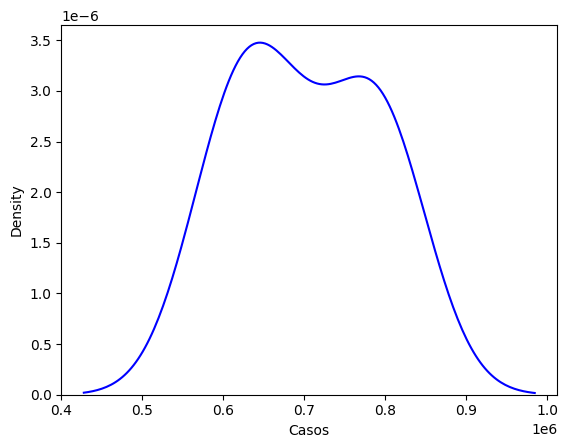

In [ ]:
sns.kdeplot(robo_gral['Casos'],color = 'blue')

count         7.000000
mean     702441.714286
std       86685.314859
min      603906.000000
25%      630323.000000
50%      684130.000000
75%      780099.000000
max      808212.000000
Name: Casos, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


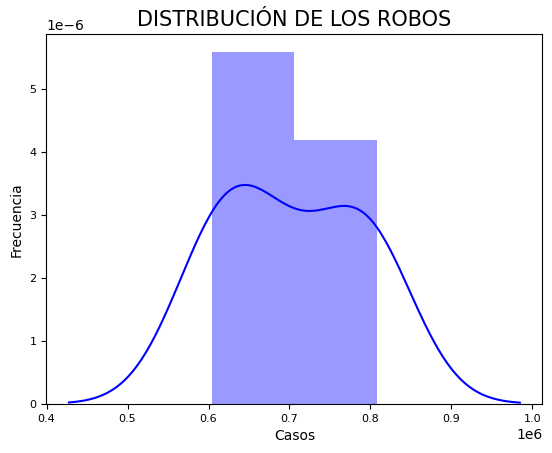

In [ ]:
#Gráfica de la distribución a nivel nacional
print(cl(robo_gral['Casos'].describe(), attrs = ['bold']))
sns.distplot(robo_gral['Casos'],color = 'blue')
plt.title('DISTRIBUCIÓN DE LOS ROBOS',fontsize = 15)
plt.xlabel('Casos',fontsize = 10)
plt.ylabel('Frecuencia',fontsize = 10)
plt.xticks(fontsize = 8)
plt.yticks(fontsize=8)
plt.show()

In [ ]:
casos = robo_gral['Casos'].values
año = robo_gral['Año'].astype(int).values
casos = casos - np.append(0,casos[:-1])
casos

array([ 652159.,   31971.,  110750.,   13332.,  -42894., -161412.,
          4581.])

In [ ]:
!pip install waterfallcharts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

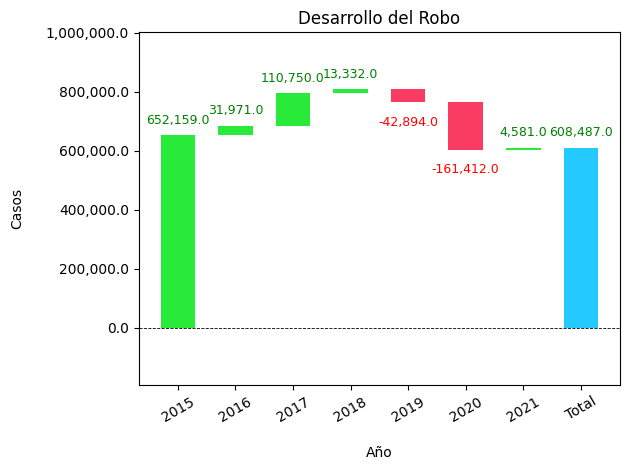

In [ ]:
import waterfall_chart
waterfall_chart.plot(año.astype(str),casos,net_label='Total',Title = 'Desarrollo del Robo',y_lab='Casos',x_lab=('Año'))

Separación por subtipos

In [ ]:
np.unique(robo['Subtipo de delito'])

array(['Otros robos', 'Robo a casa habitación',
       'Robo a institución bancaria', 'Robo a negocio',
       'Robo a transeúnte en espacio abierto al público',
       'Robo a transeúnte en vía pública', 'Robo a transportista',
       'Robo de autopartes', 'Robo de ganado', 'Robo de maquinaria',
       'Robo de vehículo automotor', 'Robo en transporte individual',
       'Robo en transporte público colectivo',
       'Robo en transporte público individual'], dtype=object)

In [ ]:
otros_robos = robo[robo['Subtipo de delito'].isin(['Otros robos','Robo a institución bancaria','Robo a negocio','Robo a transportista','Robo de ganado','Robo de maquinaria'])]
otros_robos

In [ ]:
otros_robos = otros_robos.groupby(by = ['Año','Mes','Región']).agg({"Casos":["sum"],'Tasa Incidencia Municipal':['mean']}).reset_index(drop=False)
otros_robos

In [ ]:
otros_robos = pd.DataFrame((otros_robos['Año'],otros_robos['Mes'],otros_robos['Región'],otros_robos['Casos']['sum'],otros_robos['Tasa Incidencia Municipal']['mean'],np.repeat('Otros Robos',len(otros_robos)))).T

In [ ]:
otros_robos.columns = ['Año', 'Mes', 'Región', 'Casos', 'Tasa de Incidencia Municipal', 'Subtipo de delito']
otros_robos

In [ ]:
robo_transeunte = robo[robo['Subtipo de delito'].isin(['Robo a transeúnte en espacio abierto al público','Robo a transeúnte en vía pública'])]
robo_transeunte

In [ ]:
robo_transeunte = robo_transeunte.groupby(by =['Año','Mes','Región']).agg({"Casos":["sum"],'Tasa Incidencia Municipal':['mean']}).reset_index(drop=False)
robo_transeunte

In [ ]:
robo_transeunte = pd.DataFrame((robo_transeunte['Año'],robo_transeunte['Mes'],robo_transeunte['Región'],robo_transeunte['Casos']['sum'],robo_transeunte['Tasa Incidencia Municipal']['mean'],np.repeat('Robo a Transeunte',len(robo_transeunte)))).T

In [ ]:
robo_transeunte.columns = ['Año', 'Mes', 'Región', 'Casos', 'Tasa de Incidencia Municipal', 'Subtipo de delito']
robo_transeunte

In [ ]:
robo_casa =robo[robo['Subtipo de delito'].isin(['Robo a casa habitación'])]
robo_casa

In [ ]:
robo_casa = robo_casa.groupby(by =['Año','Mes','Región','Modalidad']).agg({"Casos":["sum"],'Tasa Incidencia Municipal':['mean']}).reset_index(drop=False)
robo_casa

In [ ]:
robo_casa = pd.DataFrame((robo_casa['Año'],robo_casa['Mes'],robo_casa['Región'],robo_casa['Modalidad'],robo_casa['Casos']['sum'],robo_casa['Tasa Incidencia Municipal']['mean'],np.repeat('Robo a Casa Habitación',len(robo_casa)))).T

In [ ]:
robo_casa.columns = ['Año', 'Mes', 'Región', 'Modalidad','Casos', 'Tasa de Incidencia Municipal', 'Subtipo de delito']
robo_casa

In [ ]:
robo_autopartes=robo[robo['Subtipo de delito'].isin(['Robo de autopartes'])]
robo_autopartes

In [ ]:
robo_autopartes = robo_autopartes.groupby(by =['Año','Mes','Región','Modalidad']).agg({"Casos":["sum"],'Tasa Incidencia Municipal':['mean']}).reset_index(drop=False)
robo_autopartes

In [ ]:
robo_autopartes = pd.DataFrame((robo_autopartes['Año'],robo_autopartes['Mes'],robo_autopartes['Región'],robo_autopartes['Modalidad'],robo_autopartes['Casos']['sum'],robo_autopartes['Tasa Incidencia Municipal']['mean'],np.repeat('Robo de Autopartes',len(robo_autopartes)))).T

In [ ]:
robo_autopartes.columns = ['Año', 'Mes', 'Región', 'Modalidad','Casos', 'Tasa de Incidencia Municipal', 'Subtipo de delito']
robo_autopartes

In [ ]:
robo_vehiculo = robo[robo['Subtipo de delito'].isin(['Robo de vehículo automotor'])]
robo_vehiculo

In [ ]:
robo_vehiculo = robo_vehiculo.groupby(by =['Año','Mes','Región','Modalidad']).agg({"Casos":['sum'],'Tasa Incidencia Municipal':['mean']}).reset_index(drop = False)
robo_vehiculo

In [ ]:
robo_vehiculo = pd.DataFrame((robo_vehiculo['Año'],robo_vehiculo['Mes'],robo_vehiculo['Región'],robo_vehiculo['Modalidad'],robo_vehiculo['Casos']['sum'],robo_vehiculo['Tasa Incidencia Municipal']['mean'],np.repeat('Robo de Vehículos',len(robo_vehiculo)))).T

In [ ]:
robo_vehiculo.columns = ['Año', 'Mes', 'Región', 'Modalidad','Casos', 'Tasa de Incidencia Municipal', 'Subtipo de delito']
robo_vehiculo

In [ ]:
robo_transporte = robo[robo['Subtipo de delito'].isin(['Robo en transporte individual','Robo en transporte público colectivo','Robo en transporte público individual'])]
robo_transporte

In [ ]:
robo_transporte = robo_transporte.groupby(by =['Año','Mes','Región','Modalidad']).agg({"Casos":["sum"],'Tasa Incidencia Municipal':['mean']}).reset_index(drop=False)
robo_transporte

In [ ]:
robo_transporte = pd.DataFrame((robo_transporte['Año'],robo_transporte['Mes'],robo_transporte['Región'],robo_transporte['Modalidad'],robo_transporte['Casos']['sum'],robo_transporte['Tasa Incidencia Municipal']['mean'],np.repeat('Robo en Transporte',len(robo_transporte)))).T

In [ ]:
robo_transporte.columns = ['Año', 'Mes', 'Región', 'Modalidad','Casos', 'Tasa de Incidencia Municipal', 'Subtipo de delito']
robo_transporte

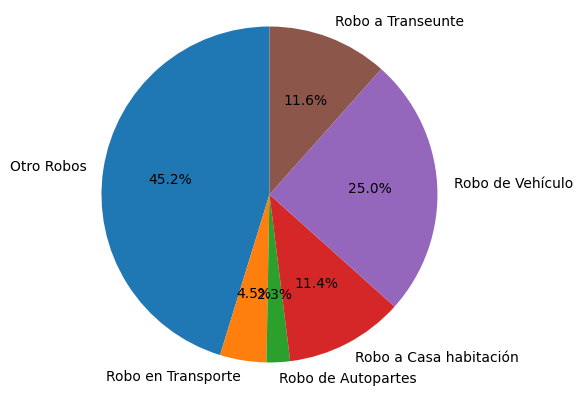

In [ ]:
#Porcentaje de robos dependiento su subtipo
import matplotlib.pyplot as plt
labels = ['Otro Robos', 'Robo en Transporte', 'Robo de Autopartes','Robo a Casa habitación','Robo de Vehículo','Robo a Transeunte']
sizes=[sum(otros_robos['Casos']),sum(robo_transporte['Casos']),sum(robo_autopartes['Casos']),sum(robo_casa['Casos']),sum(robo_vehiculo['Casos']),sum(robo_transeunte['Casos'])]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal') 
plt.show()

In [ ]:
#Unión de todos los subtipos de tobos
frames = [otros_robos,robo_transeunte,robo_casa,robo_autopartes,robo_vehiculo,robo_transporte]
robos_agregados = pd.concat(frames)
robos_agregados.reset_index(drop=True,inplace=True)
robos_agregados.sort_values(by='Casos',ascending=False)
robos_agregados

In [ ]:
robo_meses = robos_agregados.groupby(by =['Año','Mes']).agg({'Casos':['sum']}).reset_index(drop=False)
robo_meses = pd.DataFrame((robo_meses['Año'],robo_meses['Mes'],robo_meses['Casos']['sum'])).T
robo_meses.columns = ['Año','Mes','Casos']
robo_meses

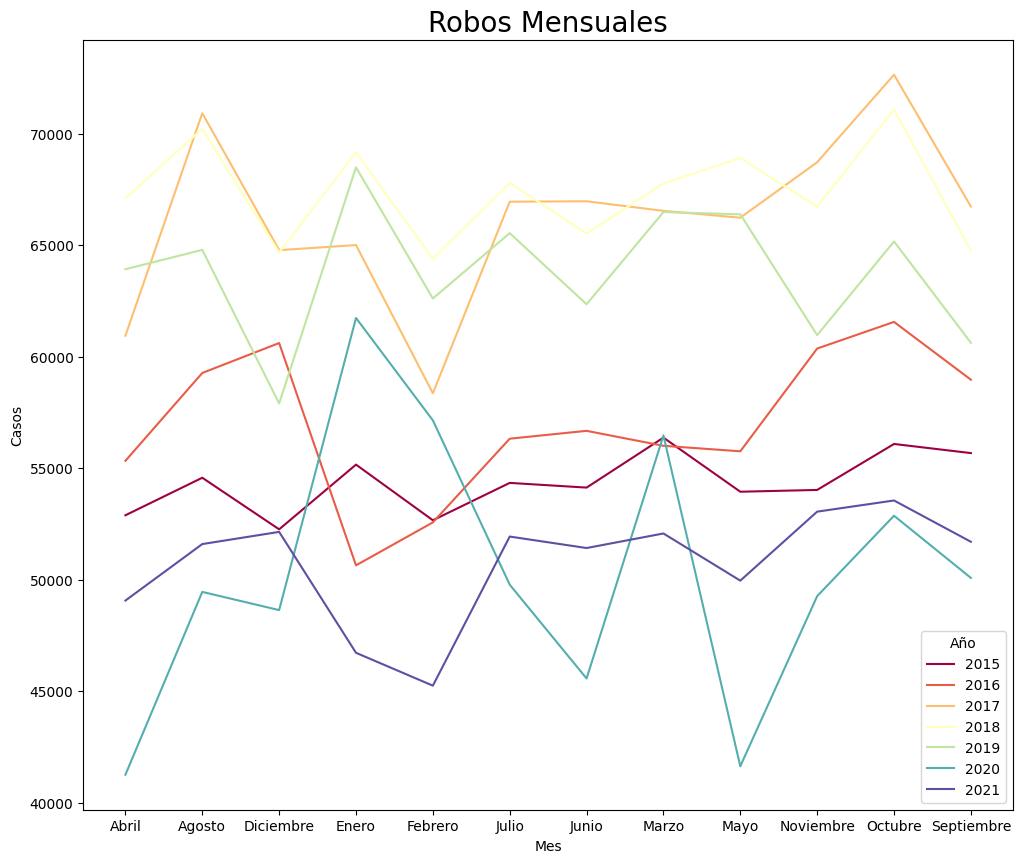

In [420]:
#Graficación de feminicidios agregados por mes y año
fig1 = plt.figure(figsize=(12,10))
plt.title('Robos Mensuales',fontsize=20)
sns.lineplot(data=robo_meses,x='Mes',y='Casos',hue='Año',palette='Spectral',ci=False)
sns.lineplot()

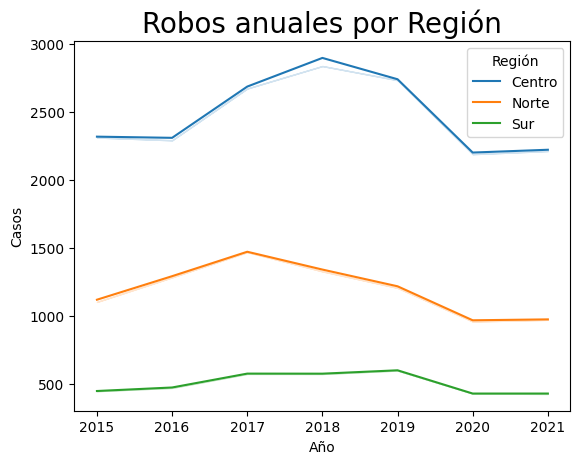

In [ ]:
#Graficación de robos agregados por regiones
plt.title('Robos anuales por Región',fontsize=20)
sns.lineplot(data=robos_agregados,x='Año',y='Casos',hue='Región',ci=False)


In [ ]:
robo_transeunte

In [ ]:
#Robo a transeunte
transeunte_agrupado = robo_transeunte.groupby(by =['Año','Región']).agg({'Casos':['sum']}).reset_index(drop=False)
transeunte_agrupado = pd.DataFrame((transeunte_agrupado['Año'],transeunte_agrupado['Región'],transeunte_agrupado['Casos']['sum'])).T
transeunte_agrupado.columns = ['Año','Región','Casos']
transeunte_agrupado

In [ ]:
casos = transeunte_agrupado[transeunte_agrupado['Región']=='Centro']['Casos'].values
año = transeunte_agrupado[transeunte_agrupado['Región']=='Centro']['Año'].values
casos = casos - np.append(0,casos[:-1])
casos

array([51645, -19885, 14538, 14156, -12464, -8721, 9173], dtype=object)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

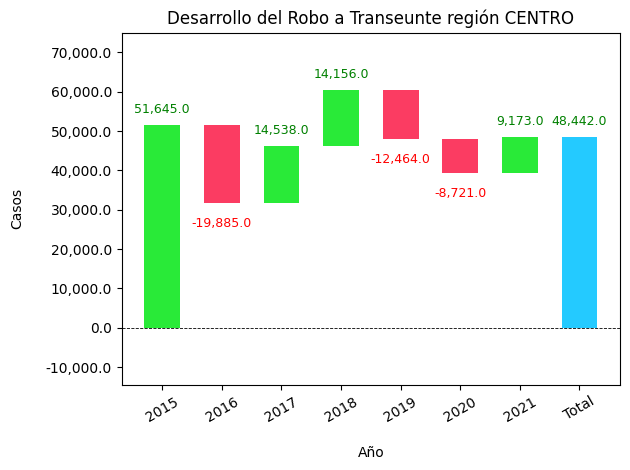

In [ ]:
#Visualización de robos
waterfall_chart.plot(año.astype(str),casos,net_label='Total',Title = 'Desarrollo del Robo a Transeunte región CENTRO',y_lab='Casos',x_lab=('Año'))

#FEMINICIDIO

delito general

In [ ]:
feminicidio_gral =base_datos[base_datos['Tipo de delito']=='Feminicidio'].copy()
feminicidio_gral.drop(['Bien jurídico afectado','Subtipo de delito'],axis=1,inplace=True)
feminicidio_gral.reset_index(drop=False)
feminicidio_gral

In [ ]:
feminicidio_gral = feminicidio_gral.groupby(by = ['Año']).agg({"Casos":["sum"],'Tasa Incidencia Municipal':['mean']}).reset_index(drop=False)
feminicidio_gral.head()

In [ ]:
feminicidio_gral= pd.DataFrame((feminicidio_gral['Año'],feminicidio_gral['Casos']['sum'],feminicidio_gral['Tasa Incidencia Municipal']['mean'])).T
feminicidio_gral.columns = ['Año', 'Casos', 'Tasa de Incidencia Municipal']
feminicidio_gral

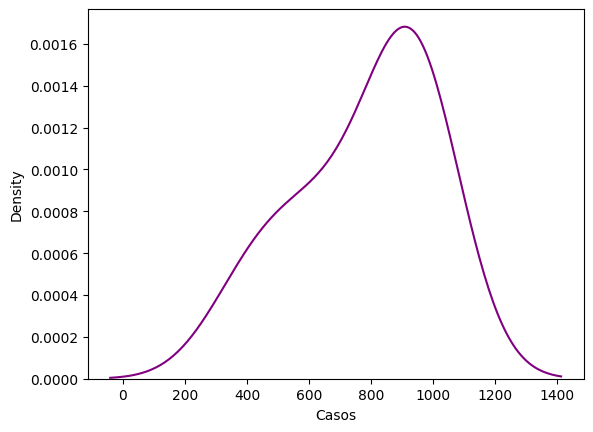

In [ ]:
#Distribución de los feminicidios
sns.kdeplot(feminicidio_gral['Casos'],color = 'purple')

count      7.000000
mean     779.285714
std      219.886876
min      406.000000
25%      647.000000
50%      895.000000
75%      947.000000
max      966.000000
Name: Casos, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


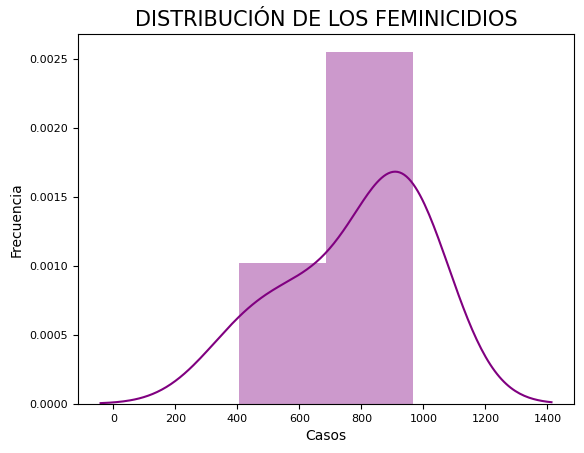

In [ ]:
#Gráfica de la distribución a nivel nacional
print(cl(feminicidio_gral['Casos'].describe(), attrs = ['bold']))
sns.distplot(feminicidio_gral['Casos'],color = 'purple')
plt.title('DISTRIBUCIÓN DE LOS FEMINICIDIOS',fontsize = 15)
plt.xlabel('Casos',fontsize = 10)
plt.ylabel('Frecuencia',fontsize = 10)
plt.xticks(fontsize = 8)
plt.yticks(fontsize=8)
plt.show()

In [ ]:
casos = feminicidio_gral ['Casos'].values
año = feminicidio_gral['Año'].astype(int).values
casos = casos - np.append(0,casos[:-1])
casos

array([406., 166., 150., 173.,  51.,   2.,  18.])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

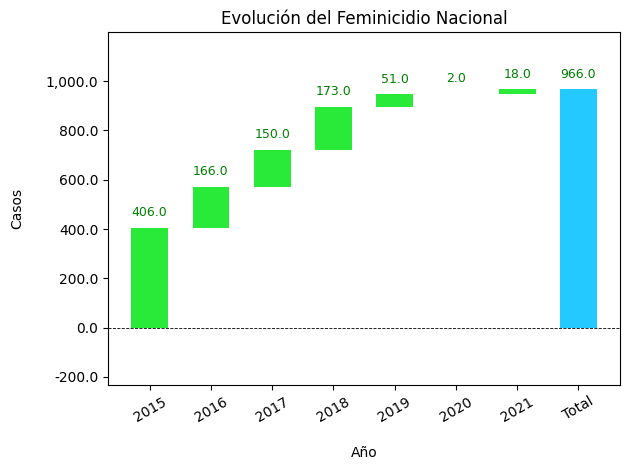

In [ ]:
#Visualización de la evolución del feminicidio
waterfall_chart.plot(año.astype(str),casos,net_label='Total',Title = 'Evolución del Feminicidio Nacional',y_lab='Casos',x_lab=('Año'))

Clasificación por modalidad

In [ ]:
feminicidio = base_datos[base_datos['Tipo de delito']=='Feminicidio'].copy()
feminicidio.drop(['Bien jurídico afectado','Subtipo de delito'],axis=1,inplace=True)
feminicidio.head()

In [ ]:
np.unique(feminicidio['Modalidad'])

array(['Con arma blanca', 'Con arma de fuego', 'Con otro elemento',
       'No especificado'], dtype=object)

In [ ]:
arma_blanca = feminicidio[feminicidio['Modalidad'].isin(['Con arma blanca'])]
arma_blanca = arma_blanca.groupby(by = ['Año','Mes','Región']).agg({"Casos":["sum"],'Tasa Incidencia Municipal':['mean']}).reset_index(drop=False)
arma_blanca = pd.DataFrame((arma_blanca['Año'],arma_blanca['Mes'],arma_blanca['Región'],arma_blanca['Casos']['sum'],arma_blanca['Tasa Incidencia Municipal']['mean'],np.repeat('Arma Blanca',len(arma_blanca)))).T
arma_blanca.columns = ['Año', 'Mes', 'Región', 'Casos', 'Tasa de Incidencia Municipal', 'Modalidad']
arma_blanca

In [ ]:
arma_fuego = feminicidio[feminicidio['Modalidad'].isin(['Con arma de fuego'])]
arma_fuego= arma_fuego.groupby(by = ['Año','Mes','Región']).agg({"Casos":["sum"],'Tasa Incidencia Municipal':['mean']}).reset_index(drop=False)
arma_fuego= pd.DataFrame((arma_fuego['Año'],arma_fuego['Mes'],arma_fuego['Región'],arma_fuego['Casos']['sum'],arma_fuego['Tasa Incidencia Municipal']['mean'],np.repeat('Arma de Fuego',len(arma_fuego)))).T
arma_fuego.columns = ['Año', 'Mes', 'Región', 'Casos', 'Tasa de Incidencia Municipal', 'Modalidad']
arma_fuego

In [ ]:
otro = feminicidio[feminicidio['Modalidad'].isin(['Con otro elemento'])]
otro = otro.groupby(by = ['Año','Mes','Región']).agg({"Casos":["sum"],'Tasa Incidencia Municipal':['mean']}).reset_index(drop=False)
otro = pd.DataFrame((otro['Año'],otro['Mes'],otro['Región'],otro['Casos']['sum'],otro['Tasa Incidencia Municipal']['mean'],np.repeat('Otro Elemento',len(otro)))).T
otro.columns = ['Año', 'Mes', 'Región', 'Casos', 'Tasa de Incidencia Municipal', 'Modalidad']
otro

In [ ]:
ne = feminicidio[feminicidio['Modalidad'].isin(['No especificado'])]
ne = ne.groupby(by = ['Año','Mes','Región']).agg({"Casos":["sum"],'Tasa Incidencia Municipal':['mean']}).reset_index(drop=False)
ne = pd.DataFrame((ne['Año'],ne['Mes'],ne['Región'],ne['Casos']['sum'],ne['Tasa Incidencia Municipal']['mean'],np.repeat('No Especificado',len(ne)))).T
ne.columns = ['Año', 'Mes', 'Región', 'Casos', 'Tasa de Incidencia Municipal', 'Modalidad']
ne

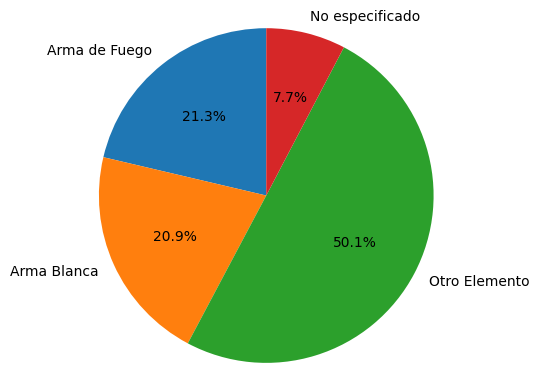

In [388]:
#Porcentaje dependiento modalidad
import matplotlib.pyplot as plt
labels = ['Arma de Fuego', 'Arma Blanca', 'Otro Elemento','No especificado']
sizes=[sum(arma_fuego['Casos']),sum(arma_blanca['Casos']),sum(otro['Casos']),sum(ne['Casos'])]
#colors='purples_r
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal') 
plt.show()

In [ ]:
#Concatenación de todas las modalidades
frames = [ne,arma_blanca,arma_fuego,otro]
fem_agregados = pd.concat(frames)
fem_agregados.reset_index(drop=True,inplace=True)
fem_agregados

In [ ]:
fem_meses = fem_agregados.groupby(by =['Año','Mes']).agg({'Casos':['sum']}).reset_index(drop=False)
fem_meses = pd.DataFrame((fem_meses['Año'],fem_meses['Mes'],fem_meses['Casos']['sum'])).T
fem_meses.columns = ['Año','Mes','Casos']
fem_meses

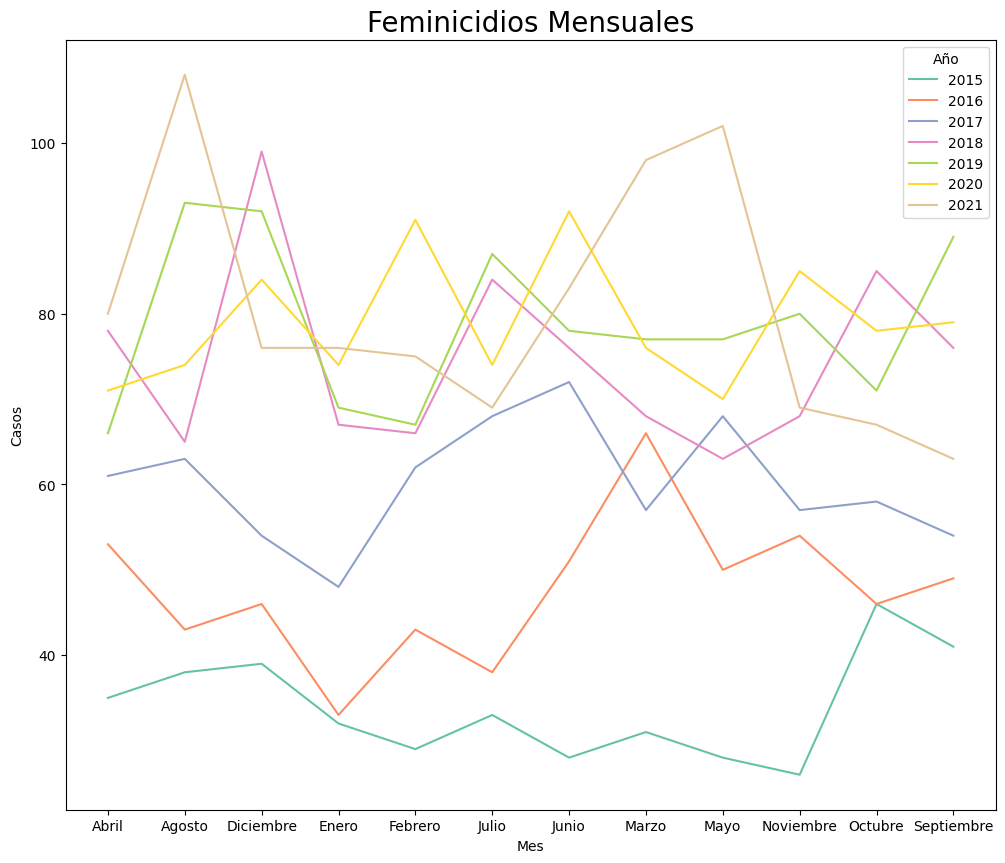

In [417]:
#Graficación de feminicidios agregados por mes y año
fig1 = plt.figure(figsize=(12,10))
plt.title('Feminicidios Mensuales',fontsize=20)
sns.lineplot(data=fem_meses,x='Mes',y='Casos',hue='Año',palette='Set2',ci=False)
sns.lineplot()

In [ ]:
fem_zonas = fem_agregados.groupby(by =['Región','Año']).agg({'Casos':['sum']}).reset_index(drop=False)
fem_zonas = pd.DataFrame((fem_zonas['Año'],fem_zonas['Región'],fem_zonas['Casos']['sum'])).T
fem_zonas.columns = ['Año','Región','Casos']
fem_zonas

In [361]:
casos = fem_zonas[fem_zonas['Región']=='Norte']['Casos'].values
año = fem_zonas[fem_zonas['Región']=='Norte']['Año'].values
casos = casos - np.append(0,casos[:-1])
casos

array([129, 31, 84, 71, 11, 1, 12], dtype=object)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

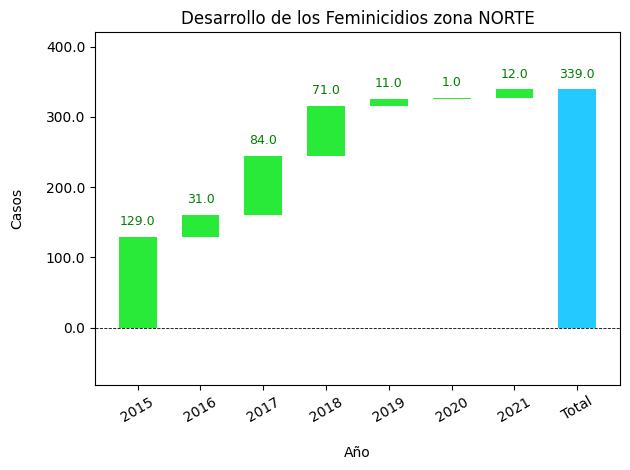

In [362]:
#Visualización de feminicidios norte de México
waterfall_chart.plot(año.astype(str),casos,net_label='Total',Title = 'Desarrollo de los Feminicidios zona NORTE',y_lab='Casos',x_lab=('Año'))

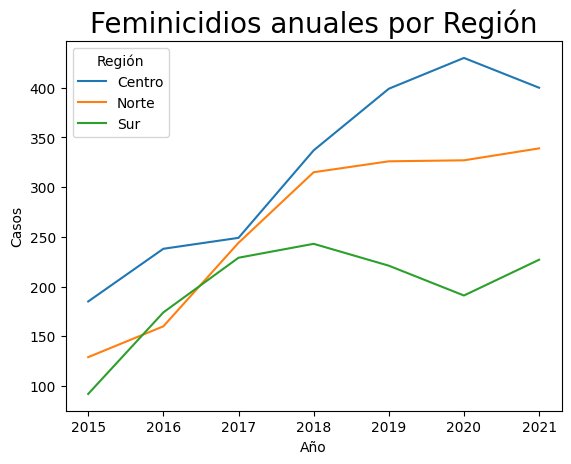

In [364]:
#Graficación de feminicidios agregados por regiones
plt.title('Feminicidios anuales por Región',fontsize=20)
sns.lineplot(data=fem_zonas,x='Año',y='Casos',hue='Región',ci=False)

#VIOLENCIA FAMILIAR

No existe subtipo o modalidad

In [ ]:
violencia_familiar =  base_datos[base_datos['Tipo de delito']=='Violencia familiar'].copy()
violencia_familiar.drop(['Bien jurídico afectado'],axis=1,inplace=True)
violencia_familiar.head()

In [369]:
violencia_anual= violencia_familiar.groupby(by =['Año']).agg({'Casos':['sum'],'Tasa Incidencia Municipal':['mean']}).reset_index(drop=False)
violencia_anual= pd.DataFrame((violencia_anual['Año'],violencia_anual['Casos']['sum'],violencia_anual['Tasa Incidencia Municipal']['mean'])).T
violencia_anual.columns = ['Año','Casos','Tasa Incidencia Municipal']
violencia_anual

,Año,Casos,Tasa Incidencia Municipal
0,2015.0,127089.0,3.396912
1,2016.0,151960.0,4.411905
2,2017.0,168192.0,4.041931
3,2018.0,180013.0,5.363398
4,2019.0,209793.0,6.613455
5,2020.0,219832.0,7.081478
6,2021.0,253303.0,8.050867


#NARCOMENUDEO

#HOMICIDIO

#ABUSO SEXUAL

In [ ]:
#gráfico líneas
#plt.plot(df['Mes'], df['data science'], label='data science')
#plt.plot(df['Mes'], df['machine learning'], label='machine learning')
#plt.plot(df['Mes'], df['deep learning'], label='deep learning')

#CORRELACIONES

Agrupamiento de las tasas complementarias, poblaciones y tasas de incidencia nacional en un sólo dataframe

In [ ]:
pob_joven2=pd.DataFrame((pob_joven2['AÑO'],pob_joven2['POB']['sum'])).T
pob_joven2.columns = ['Año','Pob Joven']
pob_joven2

KeyError: ignored

In [ ]:
#Creación de dataframe con las tasas complementarias
tasas_complementarias = pd.merge(pd.merge(delitos_seleccionados,pd.merge(TPGR_a_gral,pd.merge(TPGR_a_mujeres,pd.merge(TPGR_a_hombres,pd.merge(oc_des_anual,pob_joven2,on='Año'),on='Año'),on='Año'),on='Año'),on='Año'),TCCO_anual,on='Año')
tasas_complementarias.head()

#CORRELACIONES: ROBO

In [ ]:
g = sns.PairGrid(tasas_complementarias[tasas_complementarias['Tipo de delito']=='Robo'], hue="Año")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [ ]:
np.corrcoef(tasas_complementarias[tasas_complementarias['Tipo de delito']=='Robo']['Tasa Nacional'],tasas_complementarias[tasas_complementarias['Tipo de delito']=='Robo']['Pob Joven'])

In [ ]:
matrix = tasas_complementarias[tasas_complementarias['Tipo de delito']=='Robo'].corr().round(3)
print(matrix)

In [ ]:

cmap = LinearSegmentedColormap.from_list('RedGreenRed', ['crimson', 'lime', 'crimson'])
sns.heatmap(matrix, annot=True,cmap = 'RdYlGn')
plt.show()

In [ ]:
sns.pairplot(tasas_complementarias,hue = 'Año',diag_kind="kde",palette = 'Set2')

In [ ]:
np.corrcoef(tasas_complementarias['Presión General Total'],tasas_complementarias['Tasa Nacional'])